# Klasifikácia trás pomocou dát - 
V tejto časti sa budeme chcieť vytvoriť klasifikátor, ktorý bude priradzovať názov trasy pomocou získaných dát.

## Importy a definície


In [ ]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

from technicals import create_weekly_dataset, cycling_data, train_test_split_each_route, pd, np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error as MSE, classification_report as CR, ConfusionMatrixDisplay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
cycling_data.head()

,NAZOV,ZEMEPISNA_SIRKA,ZEMEPISNA_DLZKA,SMER_DO,SMER_Z,DATUM_A_CAS,POCET_DO,POCET_Z,ObjectId,datum_a_cas,hodina,den_v_tyzdni,mesiac,spolu
0,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 23:00:00+00,0,0,1,2025-04-22 23:00:00+00:00,23,1,4,0
1,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 22:00:00+00,0,0,2,2025-04-22 22:00:00+00:00,22,1,4,0
2,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 21:00:00+00,0,0,3,2025-04-22 21:00:00+00:00,21,1,4,0
3,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 20:00:00+00,0,0,4,2025-04-22 20:00:00+00:00,20,1,4,0
4,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 19:00:00+00,0,0,5,2025-04-22 19:00:00+00:00,19,1,4,0


## Rozdelenie dát
Trénovacie a testovacie dáta

In [5]:
features = ['POCET_Z', 'POCET_DO', 'hodina', 'den_v_tyzdni', 'mesiac']
only_cycled = cycling_data[cycling_data["spolu"] > 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(only_cycled[features], only_cycled['NAZOV'], test_size=0.4, random_state=42)
clf = RFC(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Presnosť klasifikácie:")
print(CR(y_test, y_pred))

KeyError: "None of [Index([184827, 184828, 184829, 184830, 184831, 184854, 184855, 184856, 184857,\n       184858,\n       ...\n       477317, 477318, 477319, 477320, 477321, 477322, 477323, 477324, 477325,\n       477326],\n      dtype='int64', length=56542)] are in the [columns]"

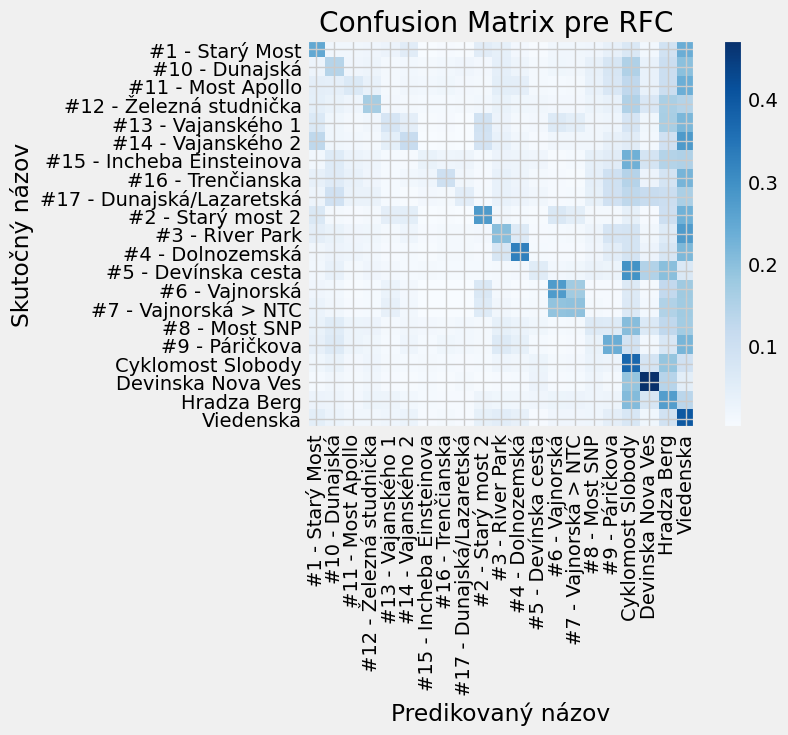

In [5]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues', xticks_rotation='vertical', include_values=False, normalize='true')
plt.title("Confusion Matrix pre RFC ")
plt.xlabel("Predikovaný názov")
plt.ylabel("Skutočný názov")
plt.show()

In [88]:
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nNajdôležitejšie faktory pre určenie názvu:")
print(importances)


Najdôležitejšie faktory pre určenie názvu:
POCET_DO        0.245951
hodina          0.210402
POCET_Z         0.206478
den_v_tyzdni    0.173556
mesiac          0.163612
dtype: float64


In [ ]:
X, y = create_weekly_dataset(cycling_data)
print(f"Počet vzoriek (triedy x týždne): {X.shape[0]}")
print(f"Počet príznakov (hodín) na vzorku: {X.shape[1]}")
print(f"Počet tried (cyklosčítačov): {np.unique(y).shape[0]}")

Počet vzoriek (triedy x týždne): 3972
Počet príznakov (hodín) na vzorku: 336
Počet tried (cyklosčítačov): 19


## Split pre každú trasu chronologicky

In [6]:
X_train, X_test, y_train, y_test = train_test_split_each_route(X, y, test_size=0.3)

# Klasifikátor - Random Forest je robustný a nepotrebuje škálovanie dát
clf1 = RFC(n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)

# Predikcia a vyhodnotenie
y_pred = clf1.predict(X_test)

print(CR(y_test, y_pred))

                     precision    recall  f1-score   support

          Cyklomost       0.86      0.72      0.78       179
  Devinska Nova Ves       0.59      0.98      0.73        96
     Devínska cesta       0.88      0.16      0.26        45
        Dolnozemská       0.84      0.73      0.78        52
           Dunajská       0.75      0.82      0.78        44
Dunajská/Lazaretská       0.00      0.00      0.00        14
        Einsteinova       0.20      0.07      0.11        14
             Hradza       0.57      0.77      0.66       173
        Most Apollo       0.27      0.07      0.11        44
           Most SNP       0.50      0.20      0.29        45
          Páričkova       0.84      0.91      0.87        45
         River Park       0.88      0.69      0.77        52
         Starý Most       0.94      0.96      0.95        52
         Starý most       0.63      0.98      0.76        43
        Trenčianska       1.00      0.50      0.67        14
         Vajanského    

c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


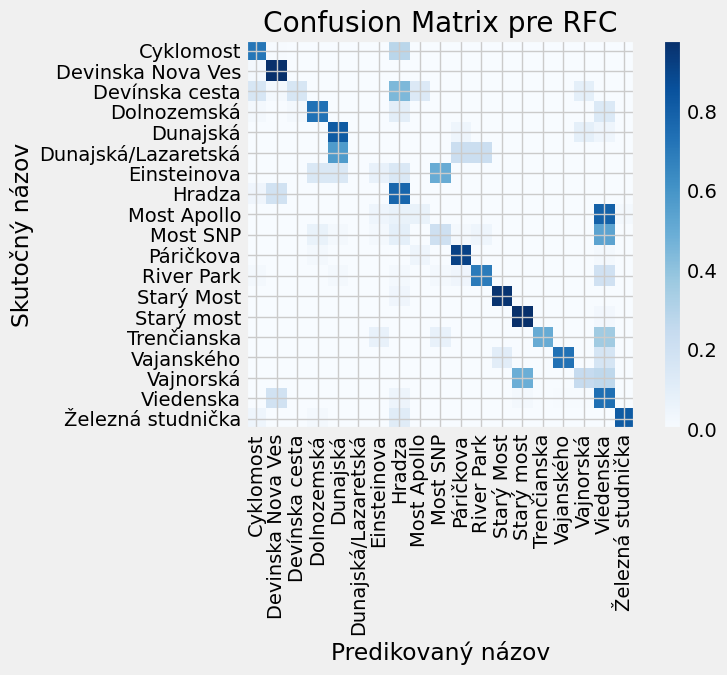

In [7]:
ConfusionMatrixDisplay.from_estimator(clf1, X_test, y_test, cmap='Blues', xticks_rotation='vertical', include_values=False, normalize='true')
plt.title("Confusion Matrix pre RFC")
plt.xlabel("Predikovaný názov")
plt.ylabel("Skutočný názov")
plt.show()

Najdôležitejšie faktory pre určenie názvu (hodiny v týždni):
     Hodina_z_do  Dôležitosť  Hodina Smer  Deň Deň_názov  Hodina_dňa  \
312          312    0.000378     144   DO    6    Nedeľa           0   
313          313    0.000120     145   DO    6    Nedeľa           1   
314          314    0.000346     146   DO    6    Nedeľa           2   
315          315    0.001980     147   DO    6    Nedeľa           3   
316          316    0.003746     148   DO    6    Nedeľa           4   
317          317    0.006050     149   DO    6    Nedeľa           5   
318          318    0.013196     150   DO    6    Nedeľa           6   
319          319    0.009476     151   DO    6    Nedeľa           7   
320          320    0.003664     152   DO    6    Nedeľa           8   
321          321    0.002410     153   DO    6    Nedeľa           9   
322          322    0.002863     154   DO    6    Nedeľa          10   
323          323    0.002695     155   DO    6    Nedeľa          11   
324

C:\Users\kubko\AppData\Local\Temp\ipykernel_14508\2834832408.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=importances.groupby(["Časť_dňa","Deň_názov"])["Dôležitosť"].mean().reset_index(), x="Deň_názov", y="Dôležitosť", hue="Časť_dňa")


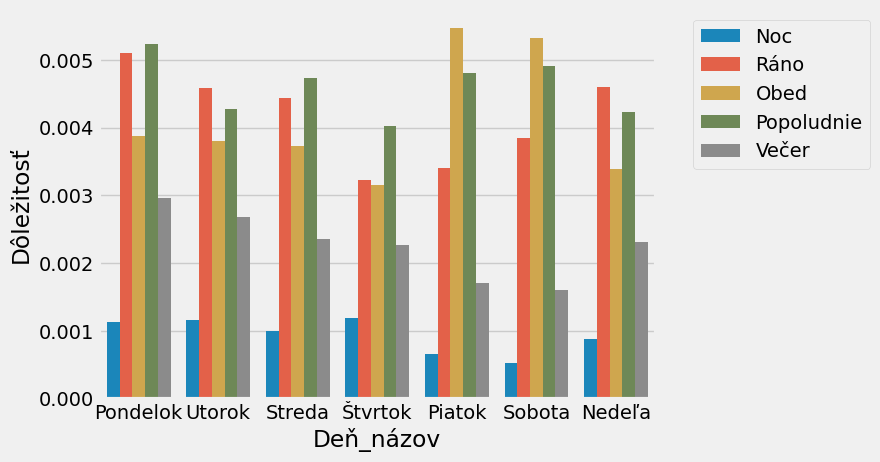

In [65]:
print("Najdôležitejšie faktory pre určenie názvu (hodiny v týždni):")
importances = pd.Series(clf1.feature_importances_, index=[i for i in range(X.shape[1])])
importances = importances.reset_index()
importances.columns = ['Hodina_z_do', 'Dôležitosť']
importances["Hodina"] = importances["Hodina_z_do"] % 168
importances["Smer"] = importances["Hodina_z_do"] // 168
importances["Smer"] = pd.Categorical(importances["Smer"].astype(str).replace({'0':'Z','1':'DO'}), categories=['Z','DO'], ordered=True)
importances["Deň"] = importances["Hodina"] // 24
importances["Deň_názov"] = importances["Deň"].astype(str).replace({'0':'Pondelok','1':'Utorok','2':'Streda','3':'Štvrtok','4':'Piatok','5':'Sobota','6':'Nedeľa'})
importances["Deň_názov"] = pd.Categorical(importances["Deň_názov"], categories=['Pondelok','Utorok','Streda','Štvrtok','Piatok','Sobota','Nedeľa'], ordered=True)
importances["Hodina_dňa"] = importances["Hodina"] % 24
importances["Časť_dňa"] = pd.cut(importances["Hodina_dňa"], bins=[-6,4,10,13,17,21,24], labels=['Noc','Ráno','Obed','Popoludnie', 'Večer', 'Noc_večer'])
importances["Časť_dňa"] = importances["Časť_dňa"].astype(str).replace('Noc_večer', 'Noc')
kategorie = ['Noc', 'Ráno', 'Obed', 'Popoludnie', 'Večer']
importances["Časť_dňa"] = pd.Categorical(importances["Časť_dňa"], categories=kategorie, ordered=True)
print(importances.tail(24))
sns.barplot(data=importances.groupby(["Časť_dňa","Deň_názov"])["Dôležitosť"].mean().reset_index(), x="Deň_názov", y="Dôležitosť", hue="Časť_dňa")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\kubko\AppData\Local\Temp\ipykernel_14508\2380493378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=importances.groupby(["Časť_dňa","Smer"])["Dôležitosť"].mean().reset_index(), x="Časť_dňa", y="Dôležitosť", hue="Smer")


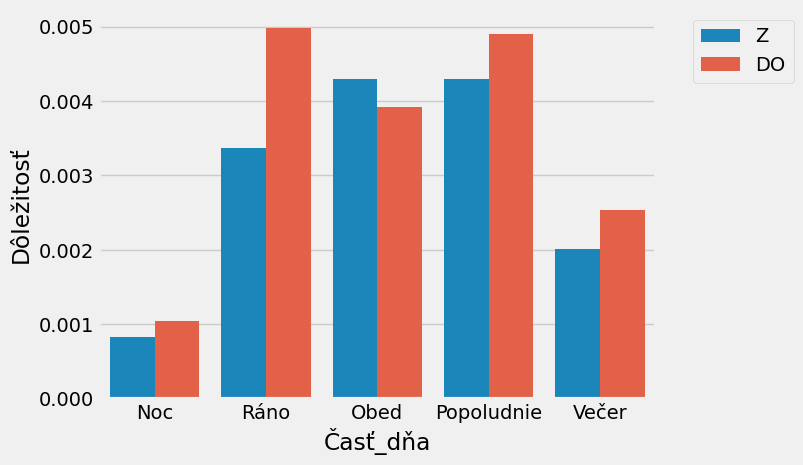

In [67]:
sns.barplot(data=importances.groupby(["Časť_dňa","Smer"])["Dôležitosť"].mean().reset_index(), x="Časť_dňa", y="Dôležitosť", hue="Smer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

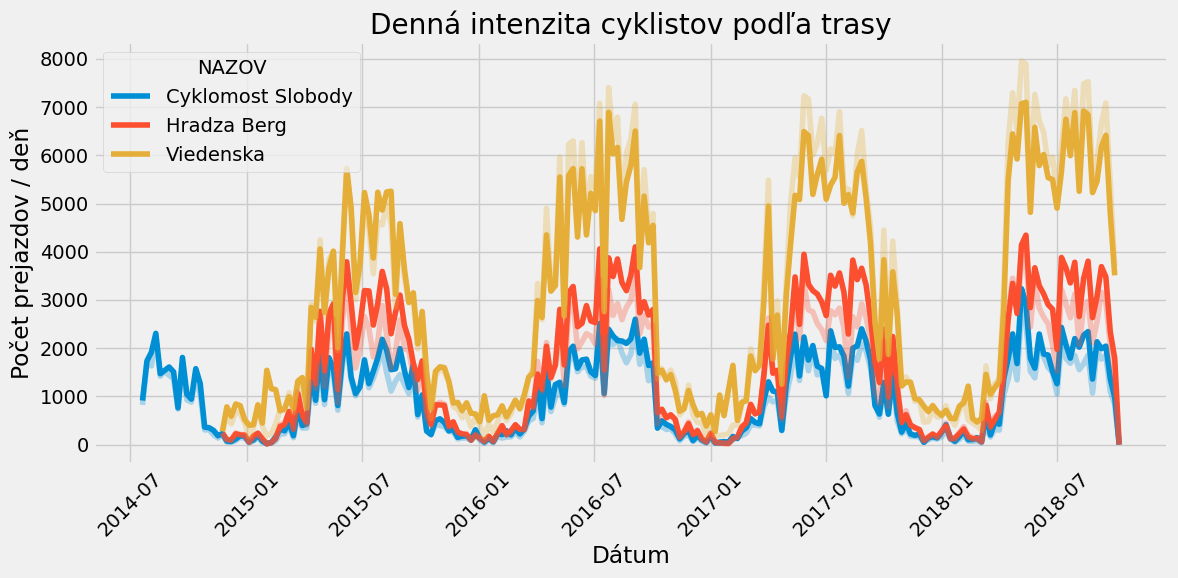

In [5]:
do_2024 = cycling_data[(cycling_data["datum_a_cas"] <= '2018-10-01')]
df_daily = do_2024.set_index('datum_a_cas').groupby(['NAZOV', pd.Grouper(freq='W')])[['POCET_DO', 'POCET_Z']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='datum_a_cas', y='POCET_DO', hue='NAZOV')
sns.lineplot(data=df_daily, x='datum_a_cas', y='POCET_Z', hue='NAZOV', legend=False, alpha=0.3)
plt.title('Denná intenzita cyklistov podľa trasy')
plt.ylabel('Počet prejazdov / deň')
plt.xlabel('Dátum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()